In [2]:
import pandas as pd
import numpy as np
#Series and DataFrame each have a plot attribute for making some basic plot types
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

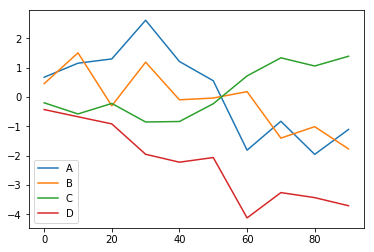

In [3]:
#DataFrame’s plot method plots each of its columns as a different line on the same subplot, 
#creating a legend automatically 
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

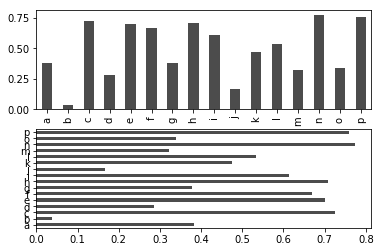

In [4]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 1) #create a figure and an array of two by one plots
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
# Most of pandas’s plotting methods accept an optional ax parameter, 
# which can be a matplotlib subplot object.
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

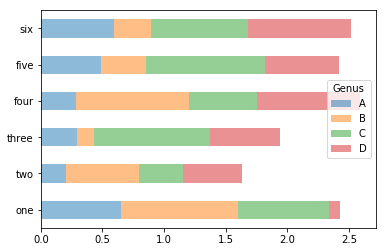

In [5]:
df = pd.DataFrame(np.random.rand(6, 4),   
                  index=['one', 'two', 'three', 'four', 'five', 'six'],   
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
#df.plot.bar()
df.plot.barh(stacked=True, alpha=0.5)

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3
size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241


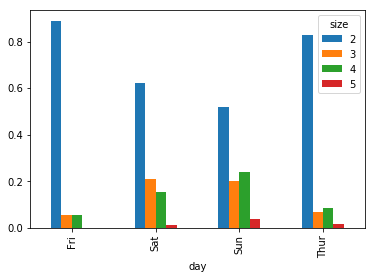

In [6]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
print(party_counts[0:9])
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
## Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
print(party_pcts)
party_pcts.plot.bar()#party sizes appear to increase on the weekend

C:\Users\ziping\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


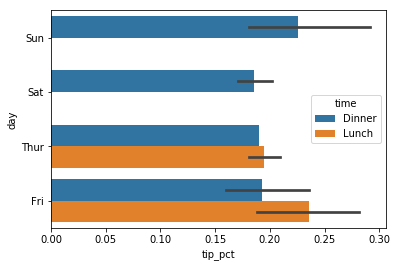

In [7]:
#With data that requires aggregation or summarization before making a plot, 
#using the seaborn package can make things much simpler. 
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
#sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
#hue option that enables us to split by an additional categorical value
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
#the bars are the average value of tip_pct. The black lines drawn on the bars represent 
#the 95% confidence interval 

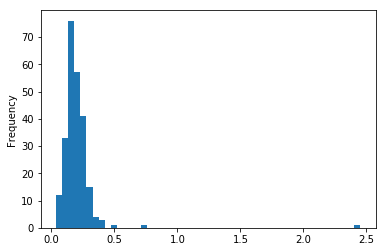

In [8]:
tips['tip_pct'].plot.hist(bins=50) #the number of data points in each bin is plotted

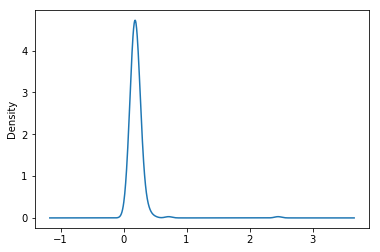

In [9]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its distplot method, which can      plot both a histogram and a continuous density estimate simultaneously.

C:\Users\ziping\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


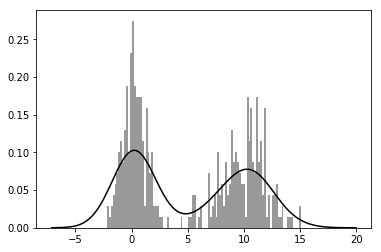

In [10]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

Scatter or Point Plots

C:\Users\ziping\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Changes in log m1 versus log unemp')

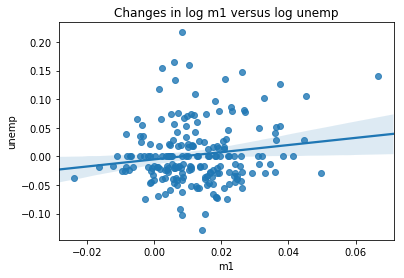

In [11]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
#seaborn’s regplot method, which makes a scatter plot and fits a linear regression line
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

C:\Users\ziping\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


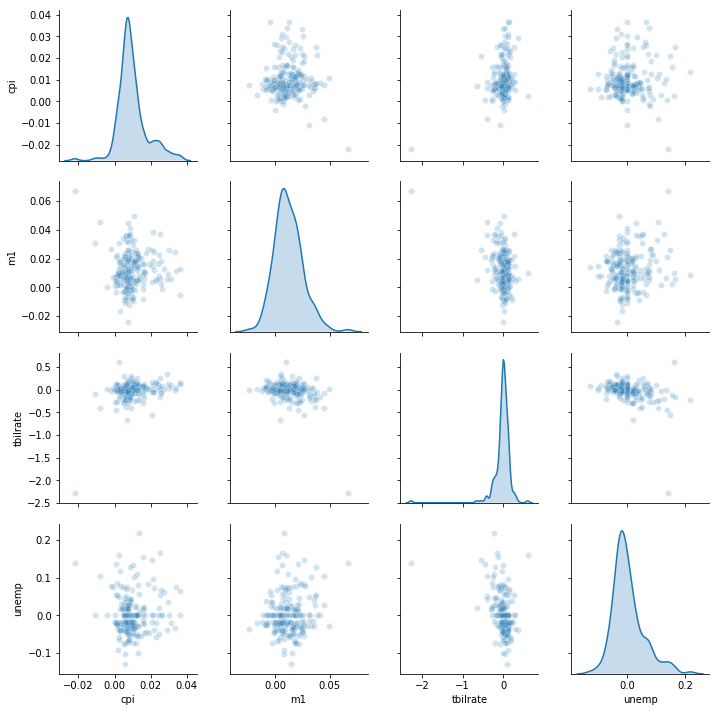

In [15]:
#pairplot function supports placing histograms or density estimates of each variable 
#along the diagonal

#diag_kind : {‘auto’, ‘hist’, ‘kde’}, optional
#Kind of plot for the diagonal subplots. The default depends on whether "hue" is used or not.

#{plot, diag, grid}_kws : dicts, optional
#Dictionaries of keyword arguments.
#pass down configuration options to the individual plotting calls on the off-diagonal elements
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

Facet Grids and Categorical Data

C:\Users\ziping\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ziping\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


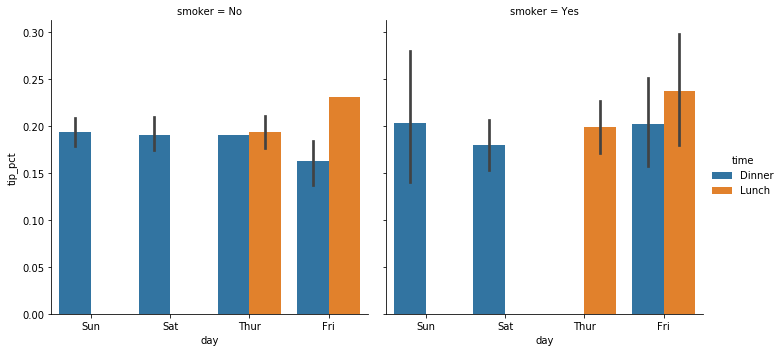

In [19]:
#grouping data
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',   
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\ziping\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ziping\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


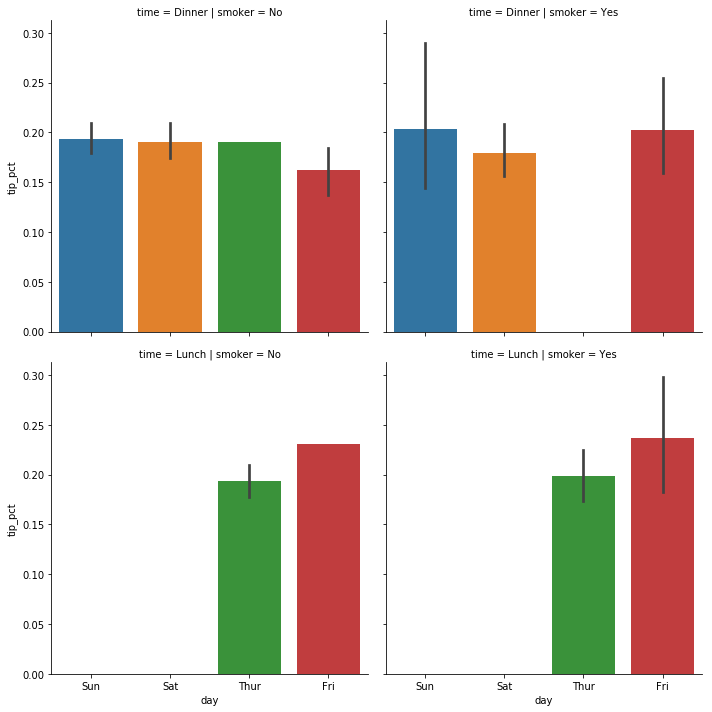

In [20]:
#can also expand the facet grid by adding one row per time value 
sns.factorplot(x='day', y='tip_pct', row='time',   
               col='smoker',   
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\ziping\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


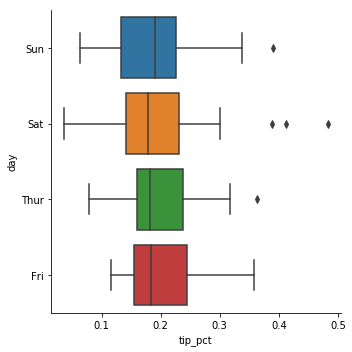

In [21]:
#box plots: show the median, quartiles, and outliers
sns.factorplot(x='tip_pct', y='day', kind='box',   
               data=tips[tips.tip_pct < 0.5])